# Sentiment Analysis

http://docs.tweepy.org/en/v3.9.0/getting_started.html

In [ ]:
!pip install textblob

In [ ]:
!pip install tweepy

In [ ]:
!pip install wordcloud

## Bring in the libraries

In [1]:
# the regulars
import pandas as pd
import numpy as np
import plotly.express as px
import osmnx as ox

# to get tweets
import tweepy as tw

# for sentiment analysis
from textblob import TextBlob
import re

# word clouds
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Twitter with tweepy

In order to use twitter's api, you will need a [developer's account](https://developer.twitter.com/en/apply-for-access). You will then have the ability to generate the tokens needed to use their API.

- http://docs.tweepy.org/en/latest/


In [6]:
# your twitter keys/secrets/tokens
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

In [7]:
# authenticate thyself with twitter
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

## Tweets by username
- http://docs.tweepy.org/en/latest/api.html#API.user_timeline

In [8]:
# Creation of query method using parameters
tweets = tw.Cursor(api.user_timeline, id='BillGates', tweet_mode='extended').items(10)

In [9]:
for index, tweet in enumerate(tweets):
    print(index, tweet.full_text)

0 Rashida Jones and I talked to Yuval Noah Harari about COVID conspiracy theories, the role social media plays in spreading misinformation, and the one lie I choose to believe even though I know it’s not always true: https://t.co/7pzUFsMf5D https://t.co/YEjZaXLTbJ
1 I believe we can avoid a climate disaster—if we deploy the clean-energy tools we have now wisely, and if we make big breakthroughs that touch every aspect of our physical economy. Creating the National Institutes of Energy Innovation would put us on the right path.
2 To reduce duplication, focus the government’s efforts, and get the most innovation out of every dollar of funding, we should create a new organization: the National Institutes of Energy Innovation.
3 We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion of ingenuity, funding, and focus from the federal government.
4 This the most important thing the U.S. can do to lead the world in innovations that wil

## Tweets by keyword

* search parameters: http://docs.tweepy.org/en/latest/api.html#search-methods

In [10]:
# search query
q = 'covid'

# filter out retweets (optional of course)
q = q + " -filter:retweets"

# how many?
max_tweets = 500
 
# Creation of query method using parameters
tweets = tw.Cursor(api.search,q=q, tweet_mode='extended').items(max_tweets)

In [11]:
for index, tweet in enumerate(tweets):
    print(index, tweet.full_text)

0 @lexiegays ai sério??? 😳😵😵 como será q ela pegou covid?! 🤔🤔🥴
1 clearly we can tell the nose pickers and the non nose pickers apart from covid test reactions lmao 😅😅😅
2 Récord de hospitalizaciones por covid-19 en EE. UU. a la espera de las vacunas https://t.co/beniQLRsJU. Gracias NTN24 Por la nota!!
3 @raphy_martinez @ForeverAnAroha @JENFL23 @AOC I live in NV and it took hours to be seen in the ER before Covid and then have the privilege of paying $250 copay plus 20% of the bill using insurance I paid $500 a month for just to cover my husband and I.
4 Many communities are struggling to maintain or increase their #housing shelter capacity this winter, due to social distancing &amp; other necessary public #health responses to limit the spread of #COVID. 

The #HousingEquity framework is a helpful guide: https://t.co/P4FoMUJggE https://t.co/IHSHDOxLQ8
5 @BallFromGrace @JoeMullinax Covid cancellations.
6 This week, it's a 2020 science story behind Rocky Road and why an all-or-nothing appr

60 I just cant help but feel concerned about this new covid vaccine 😬
61 @northernexpense @our_nextlife Covid has me convinced it won’t be fixed - unless we can flip the senate.
62 Face masks considerably reduce COVID-19 cases in Germany https://t.co/qZdOucId6S
63 @Alison79164542 @hazelglasgow @devisridhar So it's all right to die a lonely horrible death as long as you don't have Covid? 

And this isn't Christmas-specific. The endless, fake jollity around Christmas may make loneliness worse, but it's a year-round problem.
64 @sanaonline__ @realDonaldTrump Mr Trump has put himself first. Over 250k deaths, 12mln infected and increasing! He was supposed to look after 360mln not 1!!Even his own Reps admitting Biden win. Does Mr T go food bank, assist covid - no repeatedly refuses reality. He's broken, and that's not nice to watch.
65 @seanhannity Actually, I’ve never seen a human story  on COVID-19 on #foxnews from any major host
66 $908 billion bipartisan COVID stimulus relief proposal ga

105 welp. I’ve made it this long but I think I have to get a covid test done lololol
106 La ciencia, que actualmente muestra resultados espectaculares, ahora está liderada por mujeres https://t.co/lNFWjWffBO
107 @_BigSteve89 @fluffyguy @netflix I watch his stand ups all the time on TV  but I some day wanna go in person. 😊 Its on my todo list after Covid.
108 @AOC Nancy Pelosi has blocked this for months just like the last time always trying to sneak in things for unrelated to Covid. It was so important to make sure the Kennedy art center got all that money the last one because that’s really important
109 @USPS how does cutting hours during the holiday season help keep our COVID numbers down? #grandcounty @grandcountygov @gc_publichealth https://t.co/ygM3J0ex8w
110 Bahrain said on Friday it has granted emergency use authorisation for the Pfizer/BioNTech COVID-19 vaccine, becoming the second country after Britain to approve it.​ https://t.co/FlQPtHgdiu
111 As a healthcare provider, where

150 FINALLY on @DeadlineWH  @drkavitapatel  wonders if drs. &amp; nurses need to stop begging ppl to mask. Perhaps it is time to show Covid wards &amp; be more direct. YES! Sadly most ppl don’t care about others as much as they do themselves. They are not cranky toddlers who missed a nap!
151 @Franklin_Graham @OCC_shoeboxes Trump said Covid was no worse than the flu.  Trump lied.
https://t.co/55PWrTp20a
152 #Pfizer Slashed Its Original #COVID19 #Vaccine Rollout Target After Supply-Chain Obstacles https://t.co/NEsOxsMce0 #coronavirus #MSSNY
153 @realDonaldTrump Number of people who died from Covid all time high today thanks to you.
154 Help us prevent #Covid creating a #lost #generation of young people https://t.co/EndDX6N0KQ
155 Take a listen to @Startup_Canada's #Podcast on Cybersecurity During COVID with Sukhmani Devon via #soundcloud https://t.co/yt2ci9YVb7
156 Achava sempre que o covid não ia chegar à minha família até agora...
157 JUDGEMENT!!! ON YOOU, COVID!!!

https://t.co/k1pOv

195 meu pai e mãe com covid e eu não sinto nada, só pode que sou assintomático
196 Join us with @WeAreUnidosUS &amp; @LatinoCommAIDS 12/16 2p.m. ET for ‘Pandemia’ Episode 2: The World We Live in is a House of Fire”: Latinx Health and COVID-19.

Register here and join the conversation: https://t.co/USYMJ3Hd9Z. https://t.co/p9FUA2kmgm
197 Vc sabia? Bolsonaro era contra o auxílio emergencial para amenizar os efeitos da covid. Só ficou a favor para praticar o populismo eleitoreiro 
 https://t.co/HwuZ7C6352
198 However, a week-long quarantine may not be possible yet. https://t.co/ccs1tKxrqy
199 GREAT PLATES PROGRAM EXTENDED to Dec. 8th

Great Plates partners with local restaurants, hospitality &amp; transportation industries to provide meals to qualified seniors who have been diagnosed or exposed to COVID-19. 

https://t.co/uJsAYOcPlE https://t.co/ZtDn73dXwq
200 Coronavirus vaccines could be heading to Illinois within the month, so long as they get the green light from the Food and Drug Adm

255 While there are plenty of steps you can take to minimize your risk of catching COVID-19, a new survey of epidemiologists reveals spending time in a confined space outside of your household where anyone is unmasked is the must-avoid item. https://t.co/f0Osw9D547 #Coronavirus
256 So I don’t have Covid or the flu or strep but something is making me feel like shit and swell up my tonsils so second round of antibiotics here we come! Hopefully it works this time
257 He works in a Covid-19 unit in a parking garage. Trump called it fake(Source: CNN) click here --&gt; https://t.co/MZG55uFkFI
258 #Didyouknow that in a '17 study of animal care workers, 66% of those surveyed experienced 'burn out' and left the profession?

Join us for a half-day session 'Coping with COVID in the Animal Welfare Sector'. Tickets as low as $15. 
Learn more ➡️ https://t.co/l0x6hdiLYu https://t.co/djf0Y9rvMy
259 https://t.co/n9ob8jsB5d
Ever Wonder How A Governor With COVID-19 Signs Bills?
https://t.co/WfxIpkC6Wj
26

315 @Medium Rally noon City Hall. Governors kids go to private schools.  Cut Gov pay until we all are back at work.  Sweden proved vitamin C hourly stops Covid. “This virus will be around for 9+ years. We are going to have to OPEN our Economy &amp; live w it.”  The lockdown will kill.
316 i havent recieved a single international package since covid started w the exception of my meyoco one she generously resent
317 @tweettruth2me He’s part of the Get rich and powerful covid scheme.
318 @ShawnInArizona They are wearing N95 masks since that it really the best protection from Covid. I have noticed it for a while. I think the cloth is over it so they look like the rest of us.
319 Some countries claim that patents aren’t a barrier to accessing #COVID19 treatments. That’s simply not true. Which side of history are you on @ScottMorrisonMP @GregHuntMP @Birmo @MarisePayne? Help us tell our gov to be on the right side #NoCovidMonopolies
https://t.co/TbLkBR0qbk https://t.co/WDPvDZtECX
320 9/ An ad

375 The HHS Administration for Children and Families has awarded CSIU's Head Start/Early Head Start programs in Northumberland nearly $2 million in grant funding in support of early childhood education. #NCPA https://t.co/e0gGnLPR85
376 Xavier University announced its women's basketball Big East opener is postponed due to COVID-19 less than an hour before the team was scheduled to take the court.
 https://t.co/CQw5aNAvRT
377 Intel Vietnam Helps Drive Expansion, Investment, COVID Fight https://t.co/3wHmulEBpG
378 @merino_monroy @Director_PNC El nivel 4 el el que el gob de 🇺🇸 colocó a la dictadura de @nuevasideas es el nivel + peligroso y no se refiere solo al covid,  se refiere también al peligro que hay en El 🇸🇻 debido a las maras, violencia e inseguridad.
Por eso el gob gringo pide a sus ciudadanos NO VIAJAR A  🇸🇻 https://t.co/ey8FfireJW
379 US-UK sniping over vaccine approval race could dent faith in Covid shots, experts say

https://t.co/Nz1J7tgCmE
380 "PCR, while the gold standard 

424 En #Chiapas aún se presentan contagios de #COVIDー19 autoridades piden a la población no descuidar medidas preventivas https://t.co/dXDKCXEiBP
425 While @BlindBrookUFSD is preparing for potential COVID-19 testing mandates that would come if the area is declared a micro-cluster zone, some believe #BlindBrook has not moved fast enough in rolling out testing on its own and are petitioning for action.

https://t.co/D44hApjRaH https://t.co/rbWif2AHsa
426 Durante el foro ¨Colombia 4.0¨ un grupo de expertos afirmó que la pandemia por #COVID-19 no solo transformó el panorama sanitario, económico y social en la mayoría de los países. Dicen que también trajo consecuencias en el mundo de la tecnología y las transformaciones digitales. https://t.co/mFCwf7BLt6
427 ...response to Associate Justice Brett Kavanaugh, the governor's legal team also argued once again his executive order requiring private and public schools in KY to hold only virtual classes until early January is a necessary, legal re

480 Abel Ferreira testa positivo para Covid-19 e está isolado

Saiba mais: 

https://t.co/GpGPxZqXnF https://t.co/QgTcQXMUva
481 https://t.co/39BHgof8Jr

akibat mengikuti kemauan sipelanggar aturan Covid, andapun jadi kebawa2 masalahnya dia
482 ¡Cuidado! Estos son los productos milagro contra la #Covid19, de acuerdo a un análisis de Profeco 🦠😷 https://t.co/WD3ogOjGX7
483 #SLP San Luis Potosí cerca de llegar a los 35 mil contagios de #Covid19.

@ssaslp
@GobEdoSLP

https://t.co/j7CN0gTPx1
484 “We had a good conversation. I think we’re both interested in getting an outcome, both on the omnibus and on a coronavirus package,” said Senate Majority Leader Mitch McConnell. https://t.co/9ASWLibJo8
485 Bratzler said while the Moderna and Pfizer vaccines are making their way to Oklahoma, Oklahomans must continue to take precautions.

https://t.co/FCCOGlhYPn
486 A/Prof Marion Kainer will discuss 'Responding to COVID-19: a perspective from Victorian healthcare' next week at #AustCOVID19Conference 


## Tweets by keyword and place

In [12]:
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='34.068921,-118.4473751,50km', 
                   tweet_mode='extended').items(max_tweets)

In [13]:
for index, tweet in enumerate(tweets):
    print(index, tweet.full_text)

0 Let's replace all scheduled programming with live feed of COVID ICUs on all networks. Blur patient faces. Show their final goodbyes w/loved ones. Maybe that'll wake some assholes up.
1 26% of #LACounty is white, non-Hispanic. 47% white, Hispanic. The first group accounts for 1% of #COVID ICU admissions, the second 70%. Genetics not a factor. Other issues obviously are and hugely deadly. But #BarbaraFerrrer/L.A. County won't address this openly for P.C. reasons.
2 @BaddCompani Nancy is fighting for the rights of the American people (Dems Reps ALL).  She wants to make sure that workers on the job are protected from covid by their employers.  Makes sense and I support her fight.  🦅🇺🇸
3 You have the tools for virtual #GroupFacilitation. Now make your sessions as cooperative and productive as they can be. Our CEO @JohnBwarie shares his proven best practices: 
https://t.co/YCcjjSf5bx
#Leadership
4 @realDonaldTrump And COVID deaths, hospitalizations and cases
5 Here we go. @pfizer and @mode

58 @Acosta They're getting out before the 25 WH Christmas #COVIDsuperspreader parties turn the building into an even hotter Covid Hotspot than it already is. 🔥🦠🤒🤢🤧🎄🔥
59 @realDonaldTrump Deaths from Covid All Time High... 
Priorities Priorities
60 @WalkingTheWire8 Mulan. We had really good Covid situation in summer so we had cinemas open for like two weeks 😂😂😂
61 @drdavidsamadi Trump inaugurated and COVID gone.
62 @art38741656 @justinbaragona Weve been defunding education and public health for 30 years. We had doctors in trash bags fighting covid while police are in tanks. Defund means allocating more money to education and public services that reduce crime NOT getting rid of police. You’re mad because you’re ignorant
63 So, Sean what would you call #MoscowMitch blocking of not only covid relief, but at least 400 other bills, to benefit the American people...business as usual? Prick. https://t.co/2CaSllKSyE
64 @BleacherReport “COVID is just a flu”🤡
65 @realDonaldTrump More proof he only

118 @EricBoehlert 600 companies got 10 million dollars each!
Food lines stretch for miles.
Evictions about to explode US homeless and misery.

McConnell says nothing for America.
"Solutions Dems" say no Covid relief checks too!
119 'One Person Standing in the Way': Abysmal Jobs Report Puts New Pressure on McConnell for Covid Relief - https://t.co/ZblJWfBDre via @commondreams
120 My aunt just died from COVID. We weren’t close or anything, but my dad texting me about how she got it and who in her family has it now and who they probably spread it to in the last week has me never wanting to leave my house again.
121 @BCOOL333 Yes, he's just background noise. As my son said, "there's no news anymore. Just Covid &amp; tRUmp's whiney ass."
122 COVID killed as many people as 9/11 yesterday. Are people not treating it with the same respect simply because we can’t send our military to bomb it? Double standard.

Pelosi and McConnell are failing us here, too. (I will both-sides this one.)

Stay ho

163 @socialistdogmom crazy that a hundred and fifty eight cops were on duty with covid-19 and just kept working until they dropped
164 NEW: Miami-Dade Mayor Daniella Levine Cava said the county will have to rely on voluntary compliance with COVID rules to avoid a health crisis if she and other leaders can’t persuade Florida’s governor Ron De Santis to allow a tougher local response. https://t.co/AwLEQvRDOY
165 They will try and retroactively use covid as THE excuse for every constitutional law they broke. 

SCOTUS will have to choose between 
1) Caving to the mob
Or 
2) Upholding the constitution. https://t.co/vJfy89CZOq
166 Help the most vulnerable families in Los Angeles during the COVID-19 crisis. Donate today! https://t.co/MfovXqoUtf
167 Judge Chen is focusing on the actual issue at bar: even in countries where there is very low COVID infections they are not processing cases. 

Govt response: it is because the backlog is so huge. 

Geeez and whose fault is that backlog?
168 @RepDou

223 Despite Limited K-5 LBUSD Campus Activities, 54 Staff + 22 Students + 7 Visitors/Vendors Confirmed Infected With COVID-19 Since Sept 1; Parents At Mann And Prisk Latest To Get Notices of Their Child's Possible Exposure.  https://t.co/qy58N57AX0 #LBUSD #COVID #LongBeach #LBREPORT
224 @JakeSherman HAHAHAH!  I love how the media covers for Pelosi's flip-flop on COVID stimulus.  Before, its "GOP doesn't get it.  We need to CRUSH THE VIRUS."  3 weeks later, it's "no we can do a smaller deal".  Why?  Cuz she already got your votes...see u all at the next election, SUCKERS! LOL
225 @HouseGOP @SpeakerPelosi 
GOP, I’m not okay with your house rep fricking making fun of a serious public health crisis. You?He needs serious censure if not taken out of the house that is supposed to represent Americans impacted by Covid. This is beyond reprehensible https://t.co/7Rx91P2J6I
226 Join Ada and sign the Community Pledge. Click the Link Below to Sign the Community COVID-19 Pledge: https://t.co/RnkuV9N

268 @SpeakerPelosi You new stance on a smaller COVID relief package is disappointing. You have been losing my support for years, and the new games you are playing are going to cost you your legacy. I urge you to consider the larger package that campaigned on.
269 @kristababyy @branewurms @AnthonySabatini @CombatMedic175 I guess only 100 people have gotten COVID.
270 The charitable NFT of @fishman_jason is still at $10 USDC! You only have less than 30 minutes left to go! @OpenSea
https://t.co/cBWqyfbj1z https://t.co/Pucau9mmiR
271 California COVID-19 crackdown: Shelter-in-place orders, quarantines and more https://t.co/ZtNqji7oAv via @thepointsguy @ClintPHenderson
272 It’s time to play my new favorite game, “Do I Have COVID Or Did I Eat That Sandwich Too Fast?”
273 @Mabetini Living in California, this is a bit anti-climatic as we've done that years ago. So, could they maybe pass COVID relief. That would be nice.
274 The charitable NFT of @jedmccaleb is only at $10 USDC! 30 minutes left 

313 Ventura County’s public health officer said Wednesday that he expects the first doses of a COVID-19 vaccine to arrive locally in two to three weeks.

https://t.co/CBoOCIUVZQ
314 With cutting-edge research into treatments like #remdesivir and #dexamethasone, @UCLAHealth physicians have dedicated themselves to saving the lives of severely ill #COVID19 patients.

Here’s what they’ve learned since the pandemic began. ➨ https://t.co/F7MRWg4dGh
315 Los Angeles City Attorney Mike Feuer released video messages today in English and Spanish to warn people of holiday package theft during the COVID-19 crisis.

https://t.co/nduXGdPjzS
316 If you, a loved one, or someone you know has COVID-19 symptoms and is an LA County resident, schedule your COVID-19 test today! It’s free and is easy to have done. To schedule your appointment and find more information, visit https://t.co/kH1m9ftP1c

#LAFound #LAFOUND ... https://t.co/5GwHzIZwiz
317 Evictions have public health consequences. https://t.co/b1dQq

373 There is a section in the current bill that gives immunity to businesses against Covid related liability lawsuits.  

Like a lawsuit linked to one of their employees, that is FORCED to come to work or be fired, creating an outbreak to customers or other employees.
374 @Enterprise forced my cousin to come back to work while still running a fever due to covid.  I want his manager(s) in jail and Enterprise fined into oblivion.

@BernieSanders and @AOC are right in opposing the current relief bill because it would allow evil corps to be more evil https://t.co/TcUO5PJDoD
375 @icedoutomnitrix Bro, thanks so much for letting me borrow your Bentley this weekend. You know how much my gramma means to me, so picking her up from the covid nursing home in style and comfort was everything.
376 anyone else still dread going grocery shopping during covid?
377 @siushi 10,000 new cases a day and they're all like "y'all are SHEEP, covid is FAKE" lol -_-
378 For LA County - free Home Covid-19 tests
ht

433 Love this Covid illustration... https://t.co/Mk9H6N6uy8
434 @brazilceez Doubt it lol Covid made it inevitable that he was going to take an L all them counties had to actually make voting accessible so way more voices were heard
435 Florida has given up on COVID-19 

Full episodes where ever you listen to podcasts. 

#florida #covid_19 #floridalife #covid #coronavirus #coronamemes #politics #bidenharris2020 #trump #politicalmemes #podcast #economy https://t.co/aFPYvJFMYA
436 "You will destroy through COVID-19... NO MORE!!"
437 @AOC I’ve lost everything and instead of the govt helping me.... my elderly parents (on a fixed income) are taking care of me. I’m a full grown adult. This is embarrassing and sad man. Help! I’ve worked hard all my life and lost everything because of covid.
438 @SpeakerPelosi It’s unfortunate that you held that covid package for months. I honestly thought it was Mitch. As a millennial I think you and the rest of the dinosaurs are creating a huge mess in this s

477 @Hitman1600 @Hereisafriend @LamarHeisman @Ravens But Geno still on the covid list
478 Actualización COVID-19 de la Ciudad de Hawthorne.

Para ver los números COVID-19 actuales, haga clic en el siguiente enlace. Allí puede desplazarse hacia abajo para ver dónde se encuentra actualmente Hawthorne en esta pandemia:
https://t.co/14liyDibQQ https://t.co/oMa7M0dWgP
479 Bad Bunny Reveals How He's Doing Since COVID-19 Diagnosis https://t.co/jm1nu3EIxU
480 City of Hawthorne COVID-19 Update. 

To view current COVID-19 numbers, please click on the following link. There you may scroll down to see where Hawthorne currently stands in this pandemic:
https://t.co/14liyDibQQ https://t.co/7LI7c8DxB3
481 Repubs stall COVID relief https://t.co/YFCHV3P1lx
482 @JohnDelaney I really agree that this is a fair deal. I'll gladly take an extra $300 on that stimulus check to get the doses good sir

https://t.co/bBpZUzRUm9
483 2/3 Ce radiologue ferait bien de se remettre à ses études, sortir des palais dorés p

In [14]:
type(tweets)

tweepy.cursor.ItemIterator

# The tweet object

So what does tweepy return? It returns an item iterator that allows us to loop and extract information. However, for reasons that I am unable to verify, the item iterator that is returned by the `tw.Cursor` function can only run a single loop operation before it mysteriously disappears (if anybody can figure this one out, let me know!). For that reason, let's run the search again.

In [30]:
# search twitter
q='masks'
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='34.068921,-118.4473751,50km', 
                   tweet_mode='extended').items(max_tweets)

The tweet object is in *json* format. We can convert it into a dataframe for easier access:

In [31]:
json_data = [tweet._json for tweet in tweets]
df = pd.json_normalize(json_data)
df.head()

created_at                   id               id_str  \
0  Fri Dec 04 23:06:17 +0000 2020  1334997482506313729  1334997482506313729   
1  Fri Dec 04 23:05:44 +0000 2020  1334997342756495362  1334997342756495362   
2  Fri Dec 04 23:05:28 +0000 2020  1334997277845254144  1334997277845254144   
3  Fri Dec 04 23:05:27 +0000 2020  1334997271469936640  1334997271469936640   
4  Fri Dec 04 23:05:08 +0000 2020  1334997194106007553  1334997194106007553   

                                                                                                                                      full_text  \
0  RT @ianmSC: Sometimes I just sit back and reflect on the absurdity that the CDC posted a “study” on masked hairstylists where only half the…   
1  RT @ianmSC: Sometimes I just sit back and reflect on the absurdity that the CDC posted a “study” on masked hairstylists where only half the…   
2      @ABC7 States without mask enforcement have the same case rate. Has nothing to do with masks, instead the false positive rate with tests.   
3                                                                              @TheSashaFarce @ryanjreilly Masks, people. For multiple reasons.   
4                                                Thank God for face masks my face looks funny after microneedling 🥲 now I can do it more often🤍   

   truncated display_text_range  \
0      False           [0, 140]   
1      False           [0, 140]   
2      False           [6, 136]   
3      False           [28, 64]   
4      False            [0, 94]   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1             <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3             <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

   in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0                    NaN                      None                  NaN  ...   
1                    NaN                      None                  NaN  ...   
2           1.334995e+18       1334994844175925249           16374678.0  ...   
3           1.334346e+18       1334345686469447680          354931577.0  ...   
4                    NaN                      None                  NaN  ...   

  place.full_name place.country_code place.country place.contained_within  \
0             NaN                NaN           NaN                    NaN   
1             NaN                NaN           NaN                    NaN   
2             NaN                NaN           NaN                    NaN   
3             NaN                NaN           NaN                    NaN   
4             NaN                NaN           NaN                    NaN   

   place.bounding_box.type place.bounding_box.coordinates  \
0                      NaN                            NaN   
1                      NaN                            NaN   
2                      NaN                            NaN   
3                      NaN                            NaN   
4                      NaN                            NaN   

   quoted_status.quoted_status_id  quoted_status.quoted_status_id_str  \
0                             NaN                                 NaN   
1                             NaN                                 NaN   
2                             NaN                                 NaN   
3                             NaN                                 NaN   
4                             NaN                                 NaN   

   retweeted_status.quoted_status.entities.media  \
0                                            NaN   
1                                            NaN   
2            

In [32]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 313 columns):
 #   Column                                                                  Dtype  
---  ------                                                                  -----  
 0   created_at                                                              object 
 1   id                                                                      int64  
 2   id_str                                                                  object 
 3   full_text                                                               object 
 4   truncated                                                               bool   
 5   display_text_range                                                      object 
 6   source                                                                  object 
 7   in_reply_to_status_id                                                   float64
 8   in_reply_to_status_id_str              

That's a lot of columns! Twitter saves a ton of metadata for each tweet... Let's clean this up.

In [33]:
df = df[['created_at','full_text','user.screen_name','user.profile_image_url_https']]

In [34]:
df.columns = ['created_at','text','screen_name','profile_image']

In [35]:
# override the default so that we can see the entire text in the column
pd.set_option('display.max_colwidth', None)

In [36]:
df.sample(5)

created_at  \
187  Fri Dec 04 20:55:29 +0000 2020   
288  Fri Dec 04 19:59:35 +0000 2020   
274  Fri Dec 04 20:08:25 +0000 2020   
158  Fri Dec 04 21:19:28 +0000 2020   
325  Fri Dec 04 19:44:22 +0000 2020   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   text  \
187                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         @ReidyCarrick But lets get mad and defame the mayors, the governors for putting a lockdown. Something that couldve been prevented by actually being responsible citizen. Wearing masks and social distance.   
288                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        RT @ianmSC: If you were wondering if the CDC would start acknowledging that masks have completely and utterly failed, they’re now recommend…   
274                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       RT @ianmSC: Alabama’s Governor said a few days ago: “Masks work”\n\nShe mandated them on 7/16 and has repeatedly ex

Just for fun, let's convert the profile image url's into actual images. This is somewhat of a hack, and only works with the applied code below (ie, it's not baked into the dataframe).

In [37]:
from IPython.display import Image, HTML

# df = pd.DataFrame(['./image01.png', './image02.png'], columns = ['Image'])

def path_to_image_html(path):
    return '<img src="'+ path + '"/>'

pd.set_option('display.max_colwidth', None)

HTML(df.to_html(escape=False ,formatters=dict(profile_image=path_to_image_html)))

<div class="alert alert-info">
Now it's your turn! Get creative and create your own twitter search queries on matters that interest you. Make sure that you end up with a dataframe named "df" to use for the word cloud below.
</div>

## Word Cloud
Word clouds are great to visually display word clusters. The algorithms are simple. More word frequency, larger font size, less frequent words, smaller fonts sizes.

We will use the [word_cloud library](https://github.com/amueller/word_cloud).

First though, we need to clean up the tweets. Tweets are notorious for having strange characters and emoji's!

In [38]:
# function to clean tweets using regular expressions
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

In [39]:
# an example of cleaning a tweet
tweet = df.sample().text.values[0]
print(tweet)
clean_tweet(tweet)

RT @ianmSC: If you were wondering if the CDC would start acknowledging that masks have completely and utterly failed, they’re now recommend…


'RT If you were wondering if the CDC would start acknowledging that masks have completely and utterly failed theyre now recommend'

In [40]:
# create a new column for the clean text
df['clean_text'] = ''

In [41]:
# loop and add the cleaned up text to the new column
for i, row in df.iterrows():
    clean = clean_tweet(row.text)
    df.at[i,'clean_text'] = clean

In [42]:
df.sample(5)[['text','clean_text']]

text  \
98   @Jim_Jordan Not true, Don't spread false info!\nDemocrats want: \n-  Gun controlled for safety\n-  Systematic Police brutality gone, not Police\n-  Health insurance to cover all Americans\n-  Right to live freely and wear masks\n-  Straws but good for environment\n-  Luv Thanksgivings &amp; Xmas   
308                                                                                                                                                              RT @Power106LA: What are your thoughts on President-Elect Joe Biden stating that his first mandate in office will be for all Americans to w…   
458                                                  Just watched a series of insta stories that was a beautiful tribute to someone’s dad who died of covid 19. It is so sad and maddening that so many are suffering and dying, and so many people are still not wearing masks or not taking this seriously.   
437                                                                                                                                                                                                                                        RT @Pris_Stratton_: @garybryanshow Blue surgical masks, of course.   
378                                                                                                                                                             RT @ianmSC: Alabama’s Governor said a few days ago: “Masks work”\n\nShe mandated them on 7/16 and has repeatedly extended the mandate. Cases…   

                                                                                                                                                                                                                                                            clean_text  
98   Jordan Not true Dont spread false infoDemocrats want Gun controlled for safety Systematic Police brutality gone not Police Health insurance to cover all Americans Right to live freely and wear masks Straws but good for environment Luv Thanksgivings amp Xmas  
308                                                                                                                                      RT What are your thoughts on PresidentElect Joe Biden stating that his first mandate in office will be for all Americans to w  
458               Just watched a series of insta stories that was a beautiful tribute to someones dad who died of covid 19 It is so sad and maddening that so many are suffering and dying and so many people are still not wearing masks or not taking this seriously  
437                                                                                                                                                                                                                          RT Stratton Blue surgical masks of course  
378                                                                                                                                          RT Alabamas Governor said a few days ago Masks workShe mandated them on 716 and has repeatedly extended the mandate Cases

Great. Every tweet has been cleaned up. In order to create a word cloud, we need to create a single variable that has every word in every tweet from our twitter dataframe. We then feed that to the world cloud factory that will generate the word cloud for us.

In [43]:
# now put every word into a single variable
all_text = ' '.join(df['clean_text'])
all_text

'RT Sometimes I just sit back and reflect on the absurdity that the CDC posted a study on masked hairstylists where only half the RT Sometimes I just sit back and reflect on the absurdity that the CDC posted a study on masked hairstylists where only half the States without mask enforcement have the same case rate Has nothing to do with masks instead the false positive rate with tests Masks people For multiple reasons Thank God for face masks my face looks funny after microneedling now I can do it more often RT Sometimes I just sit back and reflect on the absurdity that the CDC posted a study on masked hairstylists where only half the RT Sometimes I just sit back and reflect on the absurdity that the CDC posted a study on masked hairstylists where only half the I fear that moment with masks has passed Saying wear a mask protect others was a flawed approach Most people arent interested in helping others RT Pls consider supporting our work amp so we can continue to buy necessities like fa

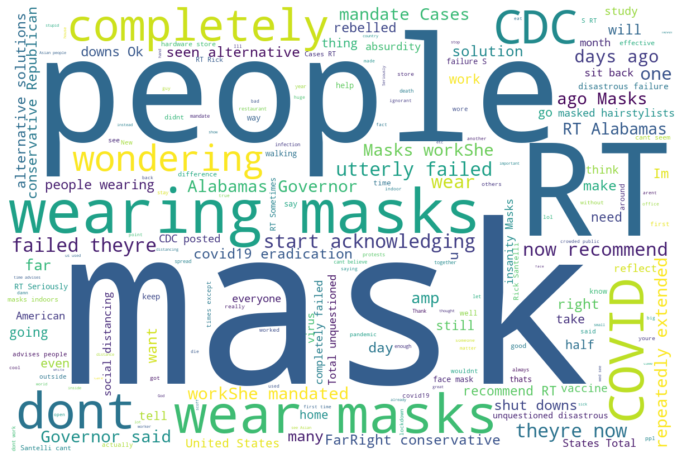

In [44]:
# create the word cloud
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white").generate(all_text)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Sentiment Analysis

For sentiment analysis, we will use the [textblob](https://textblob.readthedocs.io/en/dev/) python library.

The sentiment property returns a tuple of the form `Sentiment(polarity, subjectivity)`. The polarity score ranges from -1 (most negative) to +1 (most positive). The subjectivity ranges from 0 to 1, where 0.0 is very objective and 1.0 is very subjective.

Let's test this out on a random tweet.

In [45]:
# get a random tweet
tweet = df.sample().clean_text.values[0]
print(tweet)

# analyze the tweet
a = TextBlob(tweet)

# results
a.sentiment

RT CNBC Covid19 Jobs Update Devolves Into Pointed Exchange Over Masks AndShutdowns


Sentiment(polarity=0.0, subjectivity=0.0)

In [46]:
# create an new (empty) column for polarity
df['polarity']=''

In [47]:
# loop through every row and add the polarity value in our new column
for i, row in df.iterrows():
    a = TextBlob(row.text)
    df.at[i,'polarity'] = a.polarity

In [48]:
df[['clean_text','polarity']].sample(5)

clean_text  \
341                                 But masks stop everyone from dying though dont cha knowOh wait were all gonna die anyways regardless of mask use Well f   
437                                                                                                               RT Stratton Blue surgical masks of course   
13   iii dad Taiwan New Zealand Isle of Man Australia South Korea Japan So many places are back to normal or almost there because they gasp wore face masks   
247                           RT Seriously this is insanity Masks have completely failed all over the United States Total unquestioned disastrous failure S   
337                      Who Solution to whatA pandemicyes wear masks and socially distance Not draconian measuresIf you are High risk You Isolate yourself   

      polarity  
341          0  
437          0  
13    0.205966  
247      -0.37  
337  0.0966667

Let's quantify the results. Tweets are either positive, neutral, or negative, so let's give them categorical values.

Numpy has a convenient function `.select` that allows you to generate a categorical ranking based on conditional arguments on a given column. In other words, we can assign tweets to be "positive" or "negative" based on their polarity values.

In [49]:
# create a list of our conditions
conditions = [
    (df['polarity'] < 0), # negative
    (df['polarity'] == 0), # neutral
    (df['polarity'] > 0) # positive
    ]

# create a list of the values we want to assign for each condition
values = [
    'negative', 
    'neutral', 
    'positive'
    ]

# create a new column and use np.select to assign values to it using our lists as arguments
df['sentiment'] = np.select(conditions, values)

In [50]:
# display updated DataFrame
df.sample(5)[['clean_text','polarity','sentiment']]

clean_text  \
215  RT Because masks are so effective and important that you cant believe they worked when you used them in that crowded public sett   
190                              RT niggas is getting christmas stocking with hand sanitizer disposable masks lysol and gloves inside   
369                                        RT CDC for the first time advises people to wear masks indoors at all times except at home   
250     RT Seriously this is insanity Masks have completely failed all over the United States Total unquestioned disastrous failure S   
74                                              RT Keep your masks together with this zipper pouch I made Ships for free w code JOLLY   

     polarity sentiment  
215  0.333333  positive  
190         0   neutral  
369      0.25  positive  
250     -0.37  negative  
74        0.4  positive

In [51]:
fig = px.pie(df, 
             names='sentiment',
             width=600,
             title='Sentiment analysis for '+q,
             color='sentiment',
             color_discrete_map={'positive':'#91cf60','neutral':'#ffffbf','negative':'#d73027'}
            )
fig.update_traces(textinfo='value')
fig.show()

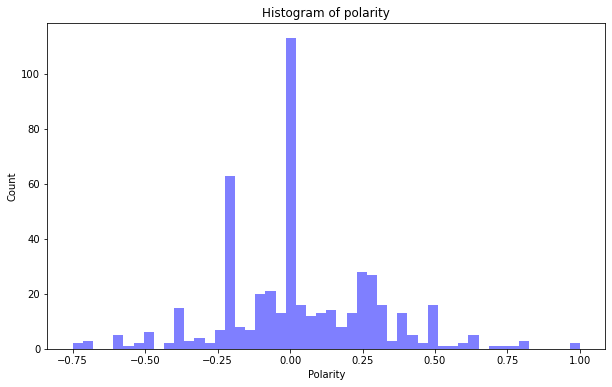

In [52]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

# Let's make a function!

In [66]:
def find_tweets(q,place,distance='50km',count=500):
    
    #
    # geocode the place to get coordinates
    #
    
    g = ox.geocoder.geocode(place)
    
    # concatenate the results
    geocode = '"'+str(g[0])+','+str(g[1])+','+distance+'"'
    
    #
    # grab the tweets
    #
    
    tweets = tw.Cursor(api.search,
                       q=q+' -filter:retweets', # no retweets
                       geocode=geocode, 
                       tweet_mode='extended').items(count)
    #
    # create a dataframe
    #
    
    json_data = [tweet._json for tweet in tweets]
    df = pd.json_normalize(json_data)

    # clean it up
    df = df[['created_at','full_text']]

    # clean the text
    df['clean_text'] = ''
    
    for i, row in df.iterrows():
        clean = clean_tweet(row.full_text)
        df.at[i,'clean_text'] = clean

    #
    # word cloud
    #
    
    all_text = ' '.join(df['clean_text'])
    
    # create the word cloud
    wordcloud = WordCloud(width=1200, 
                          height=800,
                          background_color="white").generate(all_text)

    # Display the WordCloud                    
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    #
    # sentiment analysis
    #
    
    df['polarity']=''
    
    for i, row in df.iterrows():
        a = TextBlob(row.full_text)
        df.at[i,'polarity'] = a.polarity
    
    # create a list of our conditions
    
    conditions = [
        (df['polarity'] < 0), # negative
        (df['polarity'] == 0), # neutral
        (df['polarity'] > 0) # positive
        ]

    # create a list of the values we want to assign for each condition
    values = [
        'negative', 
        'neutral', 
        'positive'
        ]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['sentiment'] = np.select(conditions, values)

    fig = px.pie(df, 
                 names='sentiment',
                 width=600,
                 title='Sentiment analysis for '+q,
                 color='sentiment',
                 color_discrete_map={'positive':'#91cf60','neutral':'#ffffbf','negative':'#d73027'}
                )
    fig.update_traces(textinfo='value')
    fig.show()
    
    num_bins = 50
    plt.figure(figsize=(10,6))
    n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel('Polarity')
    plt.ylabel('Count')
    plt.title('Average polarity: '+str(df.polarity.mean()))
    plt.show()
    
    top10 = df.sort_values('polarity').head(10)[['clean_text','polarity']]
    bottom10 = df.sort_values('polarity').tail(10)[['clean_text','polarity']]
    
    display('Top 10 positive tweets')
    display(top10)
    
    display('Top 10 negative tweets')
    display(bottom10)

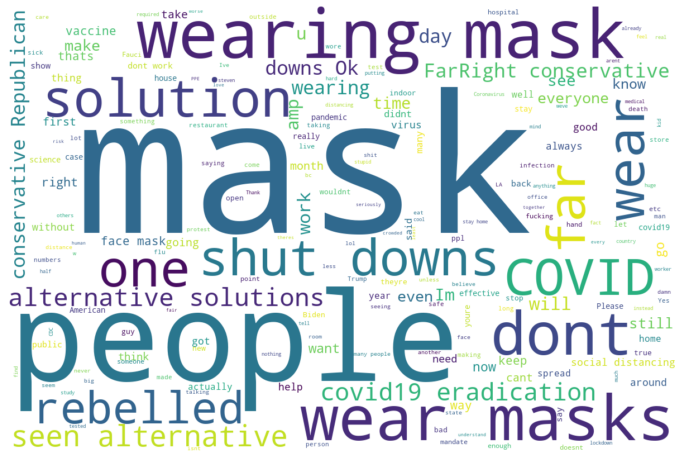

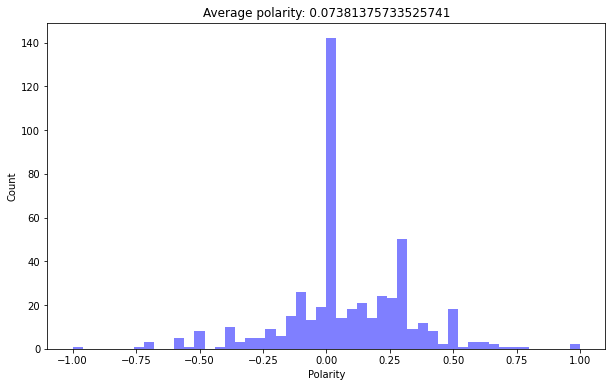

'Top 10 positive tweets'

clean_text  \
419                                                                                               So the lesson is wear your damn masks you idiots   
134                                                                                   To those that say masks dont workbut we already knew they do   
212                                                                Never forgive the dirty Republicans and filthy No Masks who ruined this country   
400                                                                                                                     KILLER MASKS it was so bad   
148                       Im gonna stick with the CDC and MIT over the terribly bad actor who played Hercules on a syndicated tv show in the 1990s   
230                                                                                      My gosh She is sterilizing things like crazy Masksetc ugh   
12   Founders Day is on a fucking Friday but I cant go to the bar with my Sandz prophytes and Neos cuz muhfuckas would t wear masks and quarantine   
381                                                                                                                        WEAR YOUR FUCKING MASKS   
10                                                   Why are my kids being forced to wear masks at an outdoor skatepark This child abuse must stop   
171                   Seriously wear your masks guys people are dumb and disgusting me as Im picking up something I dropped on the floor to eat it   

     polarity  
419        -1  
134     -0.75  
212      -0.7  
400      -0.7  
148      -0.7  
230      -0.6  
12       -0.6  
381      -0.6  
10  -0.585938  
171 -0.569444

'Top 10 negative tweets'

clean_text  \
321                                                                                                                                   One of the downsides of being a patriot who wears a mask is that masks can make stairs tricky I hope youre okay   
253                                                                                                                                                                                                            Newsom sent China more money for masks   
408                                                                            Just another glamorous day in Hollywood and I rocking our PPE as we wait for our morning Covid test Grateful to be working Stay safe friends Wear those masks WorkWife   
155                                                        Been wearing masks for months 100 days to get Covid better under control Masks are PROVEN to be more effective than NOT wearing masks Go for it Save a life today YOURS or your loved ones   
326                                                                                                                                                                                              steven Makes a lot more sense than wearing masks lol   
106                                                                                                                                                          would loved to have all the models wear dope Chanel masks What a missed opportunity dang   
121  SPOILER NO 5 Whether youre making plans or making the most of not having any we have just the thing to help you put your best foot forward in 2021Get organized with the Yearly Planner from OR kick up your feet with the Peony Foot Masks from   
227                                                                                                                                                                       Thank you for mentioning me in this awesome article full of amazing goodies   
217                                                                                                                                                                                            Best Face Masks You Can Buy 2020 Entertainment Tonight   
228                                                                                                                                                                    Great article Please do an op ed on these ppl in Philly refusing to wear masks   

     polarity  
321     0.625  
253     0.625  
408     0.625  
155   0.64375  
326      0.65  
106       0.7  
121      0.75  
227  0.783333  
217         1  
228         1

In [67]:
find_tweets(q='masks',place='90095')

## By user

In [ ]:
def find_tweets_user(u,count=500):
    
    #
    # grab the tweets
    #
    tweets = tw.Cursor(api.user_timeline, 
                       id=u, 
                       tweet_mode='extended').items(count)
    
    #
    # create a dataframe
    #
    
    json_data = [tweet._json for tweet in tweets]
    df = pd.json_normalize(json_data)

    # clean it up
    df = df[['created_at','full_text']]

    # clean the text
    df['clean_text'] = ''
    
    for i, row in df.iterrows():
        clean = clean_tweet(row.full_text)
        df.at[i,'clean_text'] = clean

    #
    # word cloud
    #
    
    all_text = ' '.join(df['clean_text'])
    
    # create the word cloud
    wordcloud = WordCloud(width=1200, 
                          height=800,
                          background_color="white").generate(all_text)

    # Display the WordCloud                    
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    #
    # sentiment analysis
    #
    
    df['polarity']=''
    
    for i, row in df.iterrows():
        a = TextBlob(row.full_text)
        df.at[i,'polarity'] = a.polarity
    
    # create a list of our conditions
    
    conditions = [
        (df['polarity'] < 0), # negative
        (df['polarity'] == 0), # neutral
        (df['polarity'] > 0) # positive
        ]

    # create a list of the values we want to assign for each condition
    values = [
        'negative', 
        'neutral', 
        'positive'
        ]

    # create a new column and use np.select to assign values to it using our lists as arguments
    df['sentiment'] = np.select(conditions, values)

    fig = px.pie(df, 
                 names='sentiment',
                 width=600,
                 title='Sentiment analysis for '+q,
                 color='sentiment',
                 color_discrete_map={'positive':'#91cf60','neutral':'#ffffbf','negative':'#d73027'}
                )
    fig.update_traces(textinfo='value')
    fig.show()
    
    num_bins = 50
    plt.figure(figsize=(10,6))
    n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel('Polarity')
    plt.ylabel('Count')
    plt.title('Average polarity: '+str(df.polarity.mean()))
    plt.show();
    return df.sample(5)[['clean_text','polarity']]

In [ ]:
find_tweets_user(u='realDonaldTrump')

In [ ]:
find_tweets_user(u='JoeBiden')